<a href="https://colab.research.google.com/github/Fatemeh-Rahmani/Adaptive-Channel-Estimation-Using-LMS-NLMS-and-RLS-Filters/blob/main/MISO_Channel_Adaptive_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Multi-Input Single-Output (MISO) Channel Adaptive Estimation Using:
## LMS, NLMS, and RLS Adaptive Filters

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_miso_data(num_samples, num_inputs, noise_variance=0.01):
    """Generates MISO data: inputs, true weights, and noisy output."""
    np.random.seed(42)  # For reproducibility

    # Random input signals
    inputs = np.random.randn(num_samples, num_inputs)

    # True weights for the MISO channel
    true_weights = np.random.randn(num_inputs)

    # Generate output with noise
    noise = np.sqrt(noise_variance) * np.random.randn(num_samples)
    output = inputs @ true_weights + noise

    return inputs, output, true_weights


In [11]:

def lms_filter(inputs, desired, step_size, num_iterations):
    """LMS Adaptive Filter."""
    num_samples, num_inputs = inputs.shape
    weights = np.zeros(num_inputs)
    errors = []

    for i in range(num_iterations):
        prediction = inputs[i] @ weights
        error = desired[i] - prediction
        weights += 2 * step_size * error * inputs[i]
        errors.append(error ** 2)

    return weights, errors

def nlms_filter(inputs, desired, step_size, epsilon=1e-6):
    """NLMS Adaptive Filter."""
    num_samples, num_inputs = inputs.shape
    weights = np.zeros(num_inputs)
    errors = []

    for i in range(num_samples):
        norm_factor = np.dot(inputs[i], inputs[i]) + epsilon
        prediction = inputs[i] @ weights
        error = desired[i] - prediction
        weights += (2 * step_size * error * inputs[i]) / norm_factor
        errors.append(error ** 2)

    return weights, errors

def rls_filter(inputs, desired, forgetting_factor, delta):
    """RLS Adaptive Filter."""
    num_samples, num_inputs = inputs.shape
    weights = np.zeros(num_inputs)
    P = np.eye(num_inputs) / delta  # Initial inverse covariance matrix
    errors = []

    for i in range(num_samples):
        input_vector = inputs[i].reshape(-1, 1)
        prediction = weights @ inputs[i]
        error = desired[i] - prediction

        # RLS update equations
        gain = (P @ input_vector) / (forgetting_factor + input_vector.T @ P @ input_vector)
        weights += (gain.flatten() * error)
        P = (P - gain @ input_vector.T @ P) / forgetting_factor

        errors.append(error ** 2)

    return weights, errors



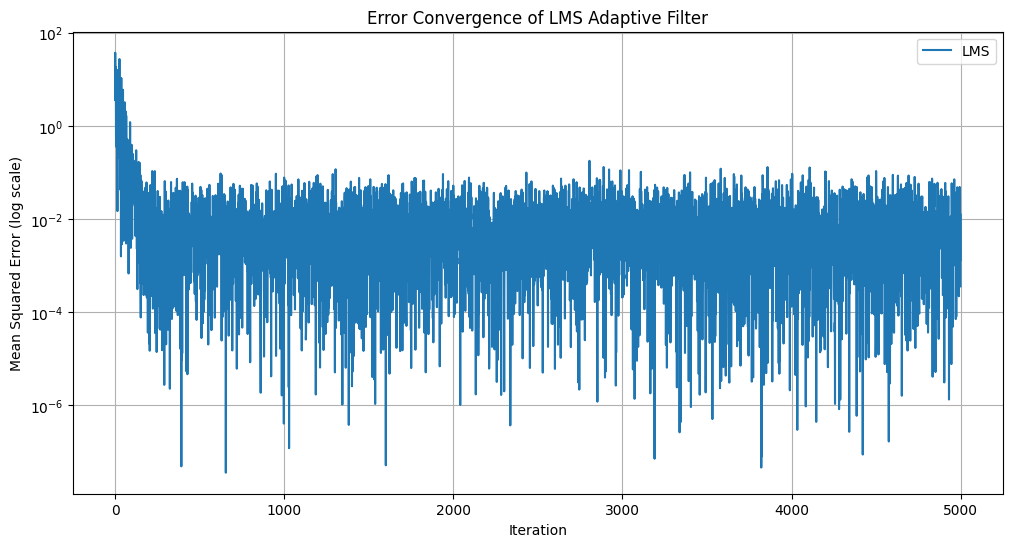

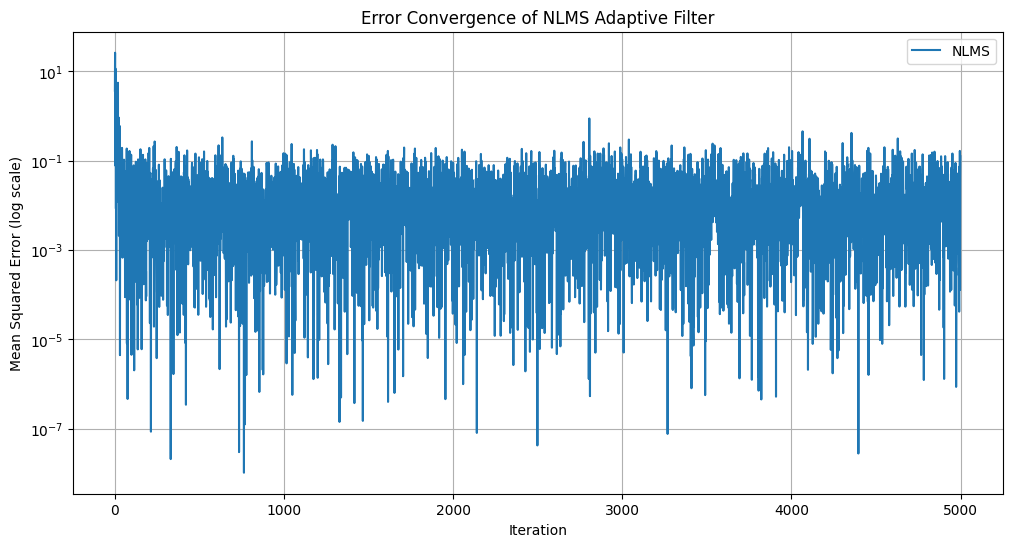

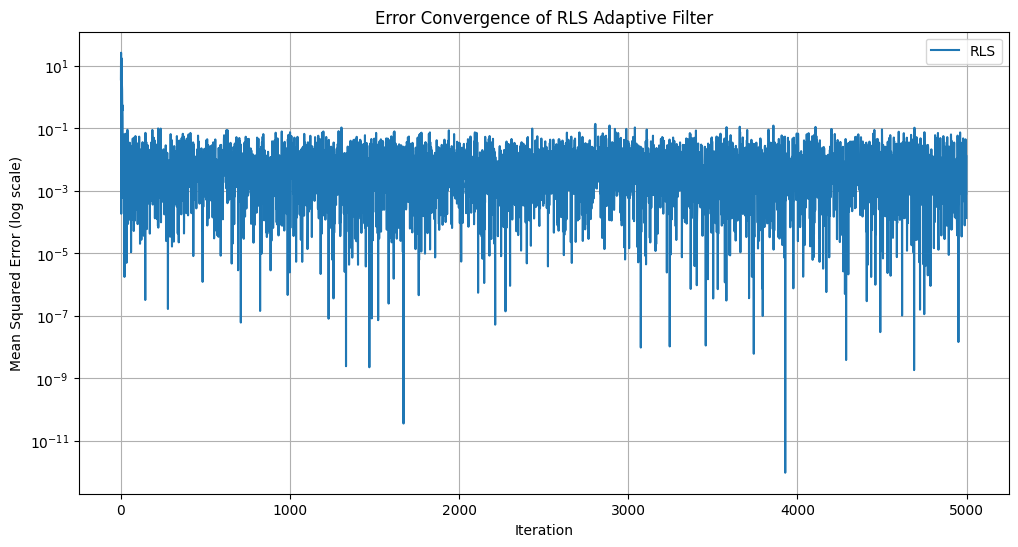

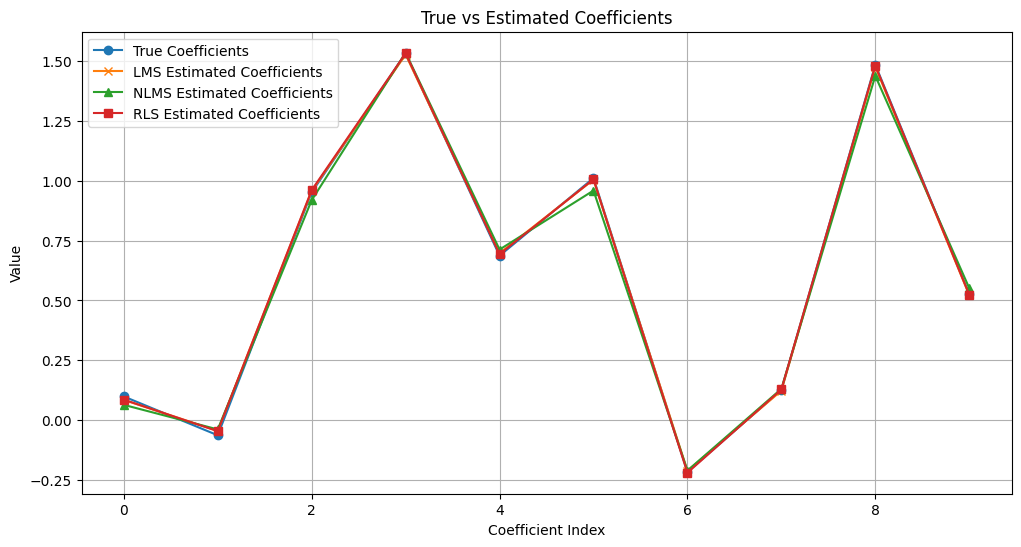

In [12]:
# Simulation Parameters
num_samples = 5000
num_inputs = 10
noise_variance = 0.01
step_size_lms = 0.01
step_size_nlms = 0.5
forgetting_factor = 0.99
delta = 0.1

# Generate MISO data
inputs, output, true_weights = generate_miso_data(num_samples, num_inputs, noise_variance)

# Apply LMS
lms_weights, lms_errors = lms_filter(inputs, output, step_size_lms, num_samples)

# Apply NLMS
nlms_weights, nlms_errors = nlms_filter(inputs, output, step_size_nlms)

# Apply RLS
rls_weights, rls_errors = rls_filter(inputs, output, forgetting_factor, delta)

# Plot Error Convergence (separately)
plt.figure(figsize=(12, 6))
plt.plot(lms_errors, label="LMS")
plt.title("Error Convergence of LMS Adaptive Filter")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (log scale)")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(nlms_errors, label="NLMS")
plt.title("Error Convergence of NLMS Adaptive Filter")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (log scale)")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(rls_errors, label="RLS")
plt.title("Error Convergence of RLS Adaptive Filter")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (log scale)")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()


# Plot true vs estimated coefficients
plt.figure(figsize=(12, 6))
plt.plot(true_weights, label='True Coefficients', marker='o')
plt.plot(lms_weights, label='LMS Estimated Coefficients', marker='x')
plt.plot(nlms_weights, label='NLMS Estimated Coefficients', marker='^')
plt.plot(rls_weights, label='RLS Estimated Coefficients', marker='s')
plt.title('True vs Estimated Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()